#  Welcome to Homework_2

## Introduction 

This notebook includes exploraory data analysis (EDA) of Norfolk coastal cleanup data provide through https://data.norfolk.gov/. Please refer to https://data.norfolk.gov/Environment/International-Coastal-Cleanup/frs3-vh3y for details about the dataset.

EDA is a fundamental step in data analysis, and the goal of EDA is to investigate and understand the structure and content of your dataset, to generate some understanding of your data through the use of descriptive statistics and to summarize key insights. The following elements and analyses are included in the EDA:

* Size of your data set. How many variables does it contain? How many samples/data points (e.g. rows of data)?
* Data types of the data set. Are all of the variables the same type? Does it have a combination of types?
* Does the data columns contain missing data? Do all variables have the same number of missing data points?
* Descriptive statistics of the variables (e.g. mean, stdev, median, etc.) and explore boxplots, bar charts and histograms to visualize the distribution of the data.
* Does the data contain outliers?
* How does the variables relate to each other? You might look at correlations, scatter plots and/or correlation matrices.
* What initial conclusions can you draw from your exploration of the data?

## EDA
### Import packages needed for this exercise
* Include pandas, seaborn, matplotlib, and scipy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats 
from scipy.stats import zscore
from scipy.stats import linregress
# the last two is not required, but I used it to calculate Z-score and identify outliers
# and draw regression line on scatter plot

### load and read data 

In [2]:
# load in the csv file, you need to specify the directory of the data file 
infile = '../data/International_Coastal_Cleanup.csv'

# read data usig pandas dataframe and specify column seprator using ','(default)
data = pd.read_csv(infile, sep =',')

### Q1. How many variables and data points does it contains

In [3]:
# get the number of rows and columns
print(data.shape)

(69, 53)


* the data set contains 69 rows and 53 columns
* meaning there are 69 datapoints for each variable or column

In [4]:
# now get the head of the columns 
print(data.head(0))

# in python, data index starts from 0

Empty DataFrame
Columns: [Area, Date, Cigarette Butts, Food Wrappers (candy, chips, etc.), Take Out/Away Containers (Plastic), Take Out/Away Containers (Foam), Bottle Caps (Plastic), Bottle Caps (Metal), Lids (Plastic), Straws, Stirrers, Forks, Knives, Spoons, Beverage Bottles (Plastic), Beverage Bottles (Glass), Beverage Cans, Grocery Bags (Plastic), Other Plastic Bags, Paper Bags, Cups, Plates (Paper), Cups, Plates (Plastic), Cups, Plates (Foam), Fishing Buoys, Pots & Traps, Fishing Net & Pieces, Fishing Line (1 yard/meter = 1 piece), Rope (1 yard/meter = 1 piece), Fishing Gear (Clean Swell), 6-Pack Holders, Other Plastic/Foam Packaging, Other Plastic Bottles (oil, bleach, etc.), Strapping Bands, Tobacco Packaging/Wrap, Other Packaging (Clean Swell), Appliances (refrigerators, washers, etc.), Balloons, Cigar Tips, Cigarette Lighters, Construction Materials, Fireworks, Tires, Toys, Other Trash (Clean Swell), Condoms, Diapers, Syringes, Tampons/Tampon Applicators, Personal Hygiene (Cle

### Q2. What are the data types?

In [5]:
print(data.dtypes)
# this provides column name and corresponding data type
# but it doesn't provide statistics of it

Area                                          object
Date                                          object
Cigarette Butts                                int64
Food Wrappers (candy, chips, etc.)             int64
Take Out/Away Containers (Plastic)             int64
Take Out/Away Containers (Foam)                int64
Bottle Caps (Plastic)                          int64
Bottle Caps (Metal)                            int64
Lids (Plastic)                                 int64
Straws, Stirrers                               int64
Forks, Knives, Spoons                          int64
Beverage Bottles (Plastic)                     int64
Beverage Bottles (Glass)                       int64
Beverage Cans                                  int64
Grocery Bags (Plastic)                         int64
Other Plastic Bags                             int64
Paper Bags                                     int64
Cups, Plates (Paper)                           int64
Cups, Plates (Plastic)                        

In [6]:
print(data.dtypes.unique()) 

[dtype('O') dtype('int64') dtype('float64')]


In [7]:
# better choice
print(data.info()) 

# 'data.info()' gives information about columns and their types 
# it also gives the total numbers of each data types
# the count of non-null values and the memory usage are given too.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       69 non-null     object 
 1   Date                                       69 non-null     object 
 2   Cigarette Butts                            69 non-null     int64  
 3   Food Wrappers (candy, chips, etc.)         69 non-null     int64  
 4   Take Out/Away Containers (Plastic)         69 non-null     int64  
 5   Take Out/Away Containers (Foam)            69 non-null     int64  
 6   Bottle Caps (Plastic)                      69 non-null     int64  
 7   Bottle Caps (Metal)                        69 non-null     int64  
 8   Lids (Plastic)                             69 non-null     int64  
 9   Straws, Stirrers                           69 non-null     int64  
 10  Forks, Knives, Spoons       

* there are three data types: float64 (n=4), int64 (n=47), object (n=2)

### Q3. Do your data columns contain missing data?
 
* Do  all variables have the same number of missing data points?

In [8]:
# 'data.info()' already gave the count of non-null values for each column

# but try 'data.isnull().sum()
print("the count of the missing data is: " + str(data.isnull().sum()))

the count of the missing data is: Area                                         0
Date                                         0
Cigarette Butts                              0
Food Wrappers (candy, chips, etc.)           0
Take Out/Away Containers (Plastic)           0
Take Out/Away Containers (Foam)              0
Bottle Caps (Plastic)                        0
Bottle Caps (Metal)                          0
Lids (Plastic)                               0
Straws, Stirrers                             0
Forks, Knives, Spoons                        0
Beverage Bottles (Plastic)                   0
Beverage Bottles (Glass)                     0
Beverage Cans                                0
Grocery Bags (Plastic)                       0
Other Plastic Bags                           0
Paper Bags                                   0
Cups, Plates (Paper)                         0
Cups, Plates (Plastic)                       0
Cups, Plates (Foam)                          0
Fishing Buoys, Pots & Trap

In [9]:
# Alternatively

if data.isnull().any().any():
    print ("there are missing values")
else:
    print("there are no missing values in any columns")

there are no missing values in any columns


### Thought: do we consider 0 as missing data? 
* based on the nature of dataset, we might should not consider them as missing data. 
* however, there are four rows that have number of volunteers of 0, which should not be included in the dataset.

In [10]:
# Find the indices of the numbers of volunteers equals to 0
indices = np.where(data['Number of Volunteers'] == 0)
# Get the row numbers
row_numbers = indices[0]

print(row_numbers)

[23 42 53 54]


### Slicing data excluding columns with object (e.g., string and date)
### Excluding the rows with "Numbers of Volunteers" of 0.

In [11]:
# Create a boolean array to specify which rows to keep
keep = np.ones(data.shape[0], dtype=bool)
keep[row_numbers] = False

# Use boolean indexing to extract only the rows that meet the specified conditions
data = data[keep]

# slice columns to remove columns with datatypes of object date, and string
# using 'data.loc[]'
data_sliced = data.loc[:, 'Cigarette Butts':'Number of Miles']

# or using 'data.iloc[]'
data_sliced = data.iloc[:, 2:]

data_sliced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 68
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cigarette Butts                            65 non-null     int64  
 1   Food Wrappers (candy, chips, etc.)         65 non-null     int64  
 2   Take Out/Away Containers (Plastic)         65 non-null     int64  
 3   Take Out/Away Containers (Foam)            65 non-null     int64  
 4   Bottle Caps (Plastic)                      65 non-null     int64  
 5   Bottle Caps (Metal)                        65 non-null     int64  
 6   Lids (Plastic)                             65 non-null     int64  
 7   Straws, Stirrers                           65 non-null     int64  
 8   Forks, Knives, Spoons                      65 non-null     int64  
 9   Beverage Bottles (Plastic)                 65 non-null     int64  
 10  Beverage Bottles (Glass)    

### Q4. Descriptive statistics for your variables
* Mean, stdev, median, etc.
* Boxplots, bar charts and histograms are great for visualizing the distribution of the data.

In [12]:
# using 'describe()' to get a summary statistics of the data frame

data.describe()

,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),...,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Total Pounds of Litter Collected,Number of Volunteers,Volunteer Hours,Number of Miles
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,546.338462,169.046154,19.815385,14.661538,109.892308,250.923077,24.415385,56.046154,15.323077,76.015385,...,1.046154,46.338462,70.061538,135.446154,308.953846,2281.730769,229.538462,20.907692,41.807692,1.652000
std,886.326782,229.436159,22.846562,19.413492,158.183648,962.549257,26.988361,63.961031,21.411962,97.377406,...,2.273700,260.133516,136.931082,388.114836,947.957680,3618.787013,405.484089,28.995001,60.831394,1.536942
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,0.000000,1.000000,1.000000,0.010000
25%,67.000000,34.000000,3.000000,1.000000,19.000000,4.000000,6.000000,12.000000,2.000000,16.000000,...,0.000000,0.000000,1.000000,0.000000,7.000000,419.000000,55.000000,7.000000,10.000000,1.000000
50%,171.000000,82.000000,10.000000,7.000000,48.000000,18.000000,13.000000,29.000000,7.000000,38.000000,...,0.000000,0.000000,14.000000,17.000000,93.000000,988.000000,100.000000,11.000000,22.500000,1.000000
75%,560.000000,213.000000,32.000000,22.000000,127.000000,44.000000,33.000000,73.000000,21.000000,91.000000,...,1.000000,14.000000,65.000000,102.000000,228.000000,2093.000000,200.000000,23.000000,43.500000,2.000000
max,3639.000000,1203.000000,90.000000,106.000000,780.000000,6269.000000,109.000000,368.000000,136.000000,395.000000,...,14.000000,2093.000000,750.000000,2806.000000,7415.000000,20544.000000,2545.000000,178.000000,396.000000,10.000000


In [13]:
# if you want to get statistics of a specific column (e.g.,number of volunteers), follow this:

mean_num_volunteers = data['Number of Volunteers'].mean()
print("The mean number of volunteers is: " + str(mean_num_volunteers))

std_num_volunteers = data['Number of Volunteers'].std()
print("The std of the number of volunteers is: " + str(std_num_volunteers))

median_num_volunteers = data['Number of Volunteers'].median()
print("The median number pf volunteers is: " + str(median_num_volunteers))

The mean number of volunteers is: 20.907692307692308
The std of the number of volunteers is: 28.995001227001975
The median number pf volunteers is: 11.0


* Histrogram and frequency plot

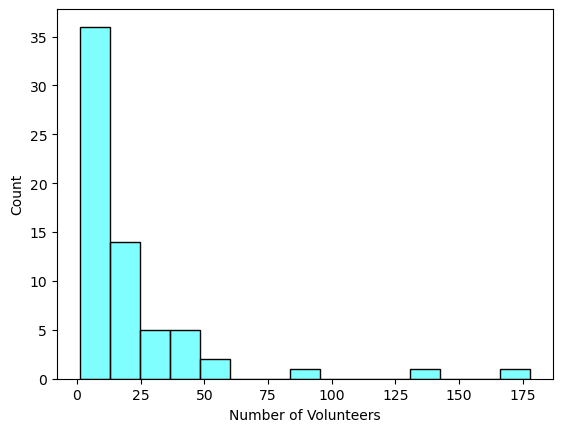

In [14]:
# using seaborn to get a histrogram of the distribution of Volunteers numbers
sns.histplot(data['Number of Volunteers'],kde=False, bins = 15, color = 'cyan',alpha=0.5)
plt.xticks(np.arange(0, 200, step=25))
plt.show()

* this shows most of the time, number of volunteers was around

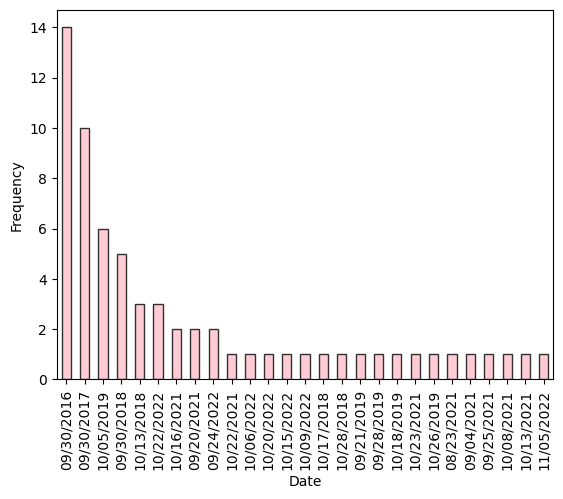

In [15]:
# see Date frequency
frequency = data['Date'].value_counts()
frequency.plot(kind='bar',color = 'pink',alpha=0.8,linewidth= 1,edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

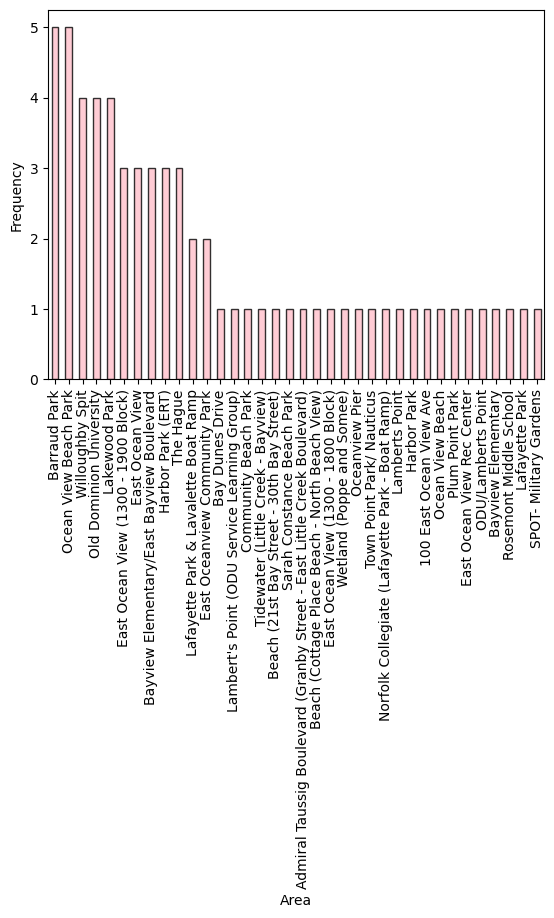

In [16]:
# see how frequent of Area
frequency = data['Area'].value_counts()
frequency.plot(kind='bar',color = 'pink',alpha=0.8,linewidth= 1,edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

* It shows that marjority sites were visited only once

* Get the total numbers of volunteers to see which Area and year/date have had the highest volunteer numbers

* Groupby function 

In [17]:
# total number of volunteers grouped by Area
total_voluns = data.groupby('Area')['Number of Volunteers'].sum()
print(f'the total number of vounteers is : {total_voluns}')

the total number of vounteers is : Area
100 East Ocean View Ave                                                      5
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)     10
Barraud Park                                                               322
Bay Dunes Drive                                                              3
Bayview Elememtary                                                          26
Bayview Elementary/East Bayview Boulevard                                   31
Beach (21st Bay Street - 30th Bay Street)                                    5
Beach (Cottage Place Beach - North Beach View)                               9
Community Beach Park                                                         3
East Ocean View                                                             38
East Ocean View (1300 - 1800 Block)                                          2
East Ocean View (1300 - 1900 Block)                                         24
East Ocean V

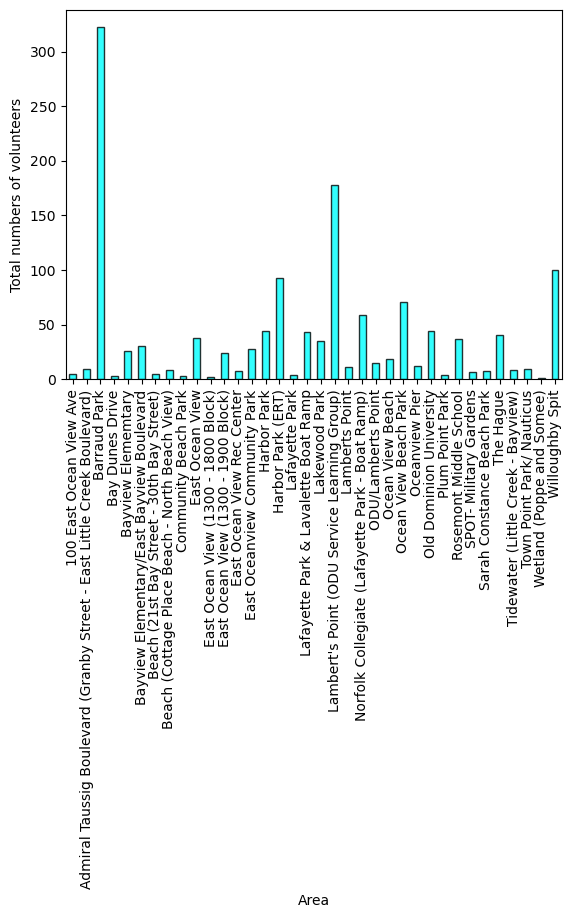

In [18]:
# plot the barchart
total_voluns.plot(kind='bar',color = 'cyan',alpha=0.8, linewidth= 1,edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Total numbers of volunteers')
plt.show()

* It shows that "barraud park" had the highest aggregated numbers of volunteers

#### Seaborn barplot
* In seaborn barplot, the height of each bar represents the count or frequency of the categories in the data (by default, it is the mean), and the length of the bar represents the range of the data, the error bars indicate the standard deviation, standard error, or confidence interval of the data.

* If there is not enough data to create the barplot, it will only display as a bar without range(error bar) as shown below.

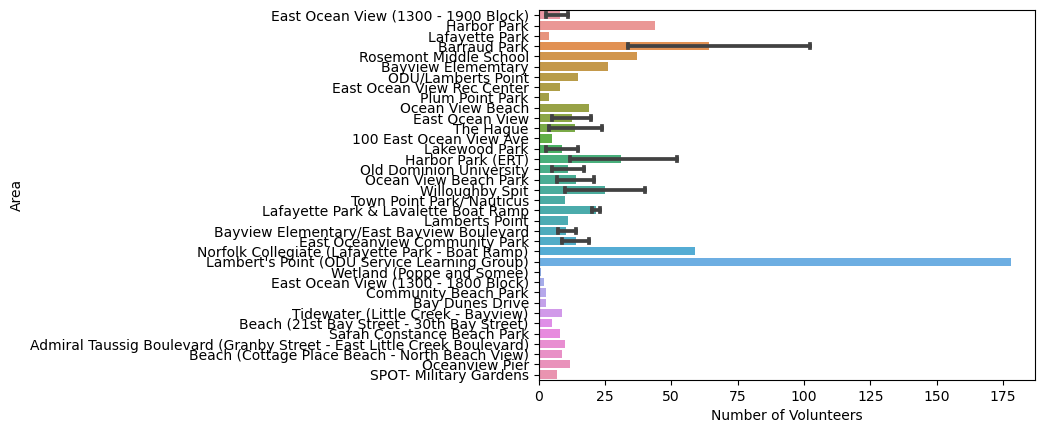

In [19]:
# see how volunteers numbers change over Area
sns.barplot(x=data['Number of Volunteers'], y=data['Area'],capsize=.4)
plt.xlabel('Number of Volunteers')
plt.ylabel('Area')
plt.show()

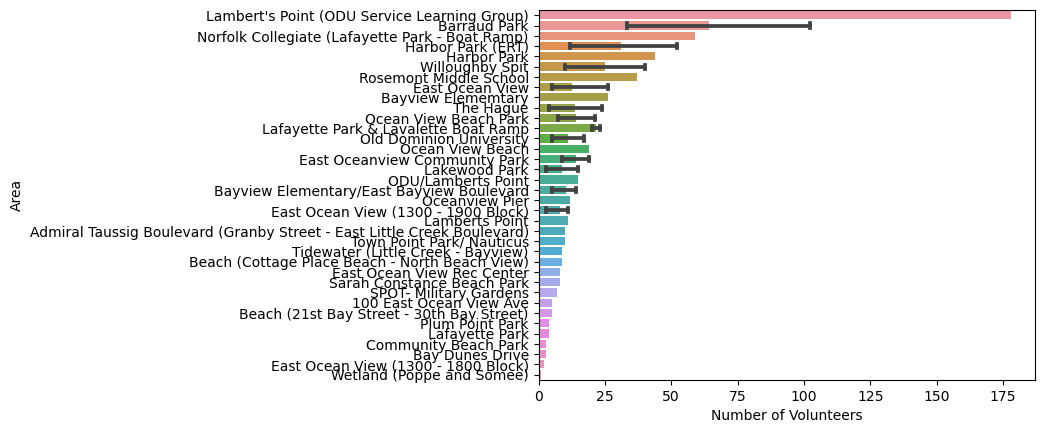

In [20]:
# see if you can sort this bar chart from highest to lowest
data.sort_values(by='Number of Volunteers', ascending=False, inplace=True)
sns.barplot(x=data['Number of Volunteers'], y=data['Area'],capsize=.4)
plt.xlabel('Number of Volunteers')
plt.ylabel('Area')
plt.show()

* Now we can see the number of volunteers is highest at Lambert's point by ODU campus
* But Lambert's point was only visited once, it doesn't have range or stdev value
* Actually, Barraud Park has the highest aggregated volunteer numbers and it was visited every year.

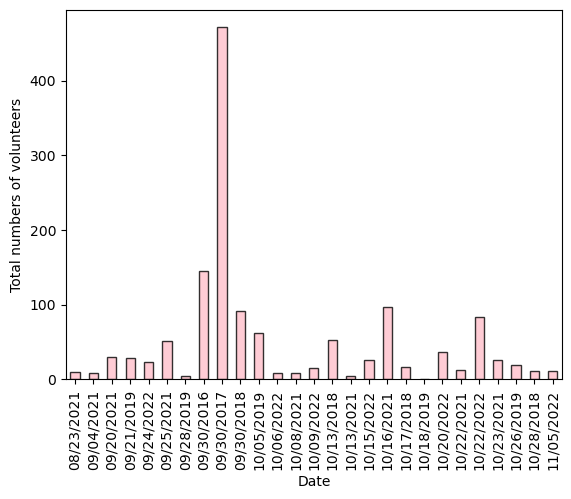

In [21]:
# total number of volunteers grouped by Date
total_voluns = data.groupby('Date')['Number of Volunteers'].sum()
total_voluns.plot(kind='bar',color = 'pink',alpha=0.8, linewidth= 1,edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Total numbers of volunteers')
plt.show()

* It shows that 09/30/2017 had the highest numbers of volunteers

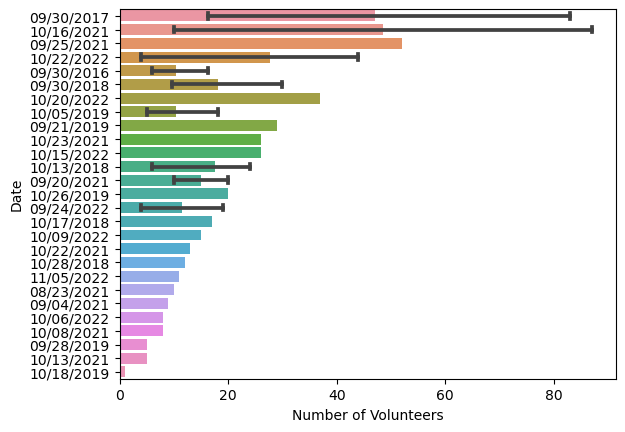

In [22]:
# using seaborn barplot to generate a barchart of volunteers numbers on different dates
data.sort_values(by='Number of Volunteers', ascending=False, inplace=True)
sns.barplot(x=data['Number of Volunteers'], y=data['Date'],data=data,capsize=.4)
plt.xlabel('Number of Volunteers')
plt.ylabel('Date')
plt.show()

* Though 09/30/2017 had the highest aggreagated volunteer numbers, seaborn barplot indicated that 10/16/2021 had the highest mean and range of volunteer numbers. 
* on 09/30/2017, there were 11 area visited, but on 10/16/2021, only 2 area were visited.
* I don't think it is fair comparison based on dramatic contrasting in data density.

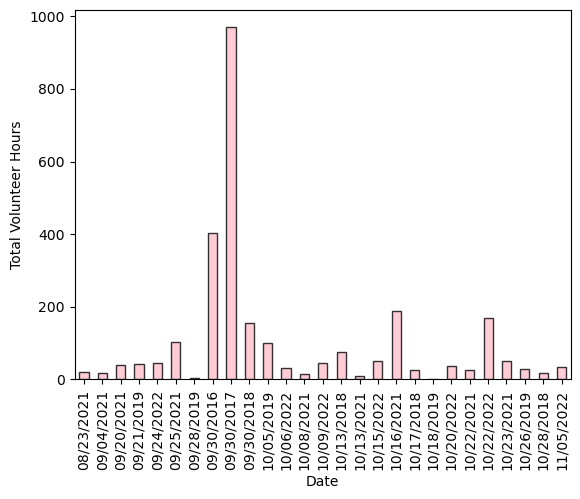

In [23]:
# total number of volunteer hours grouped by Date
total_voluns = data.groupby('Date')['Volunteer Hours'].sum()
total_voluns.plot(kind='bar',color = 'pink',alpha=0.8, linewidth= 1,edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Total Volunteer Hours')
plt.show()

* frequency plot shows that 09/30/2017 yielded the higest total volunteer hours

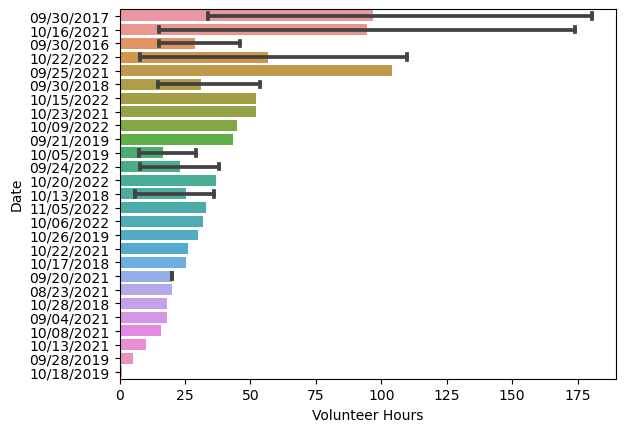

In [24]:
data.sort_values(by='Volunteer Hours', ascending=False, inplace=True)
sns.barplot(x=data['Volunteer Hours'], y=data['Date'],capsize=.4)
plt.xlabel('Volunteer Hours')
plt.ylabel('Date')
plt.show()

* Though 09/30/2017 had the highest aggreagated volunteer hours, seaborn barplot indicated that 10/16/2021 had the highest mean and range of volunteer hours. 
* on 09/30/2017, there were 11 area visited, but on 10/16/2021, only 2 area were visited.
* this is similar to volunteer numbers analyzed above

* violin plot combines the features of a box plot and a kernel density plot. 
* the shape of the violin represents the density of the data at different values.
* Z-score result shows there was one outliers in the column of "Cigarette Butts".

* if there is only a bar without shape, it means data points are insufficient

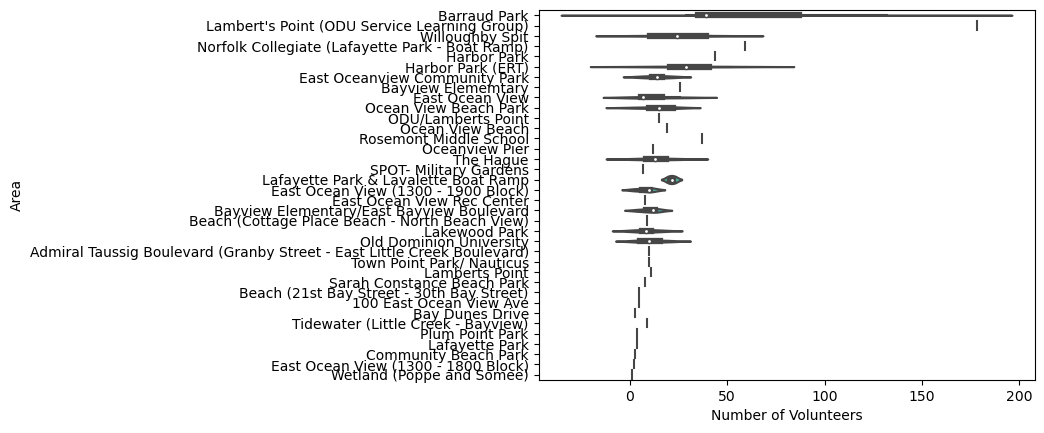

In [25]:
# violin plot
sns.violinplot(data=data, x='Number of Volunteers', y='Area')
plt.show()

### Q5. Does your data contain outliers? 

* from both boxplot and violin plot, we can inspect that at Barraud Park, the number volunteers has large variations, which may indicate something  


* try Z-score in scipy.stats 
* a Z-score is a value indicates how many standard deviations a data point is from the mean of the dataset, commonly,  abs(Z-score) > 3 is considered as outliers

In [26]:
# Z-score calculation
z = np.abs(stats.zscore(data['Number of Volunteers']))
print (z)

# Identifying outliers 
outliers = np.where(z > 3)
print(outliers)

50    3.861247
52    5.460073
13    2.297177
68    0.733107
49    1.323978
        ...   
25    0.552905
56    0.657177
55    0.691934
43    0.691934
22    0.691934
Name: Number of Volunteers, Length: 65, dtype: float64
(array([0, 1], dtype=int64),)


* Z-score result shows there was one outliers in the column of "Number of Volunteers"

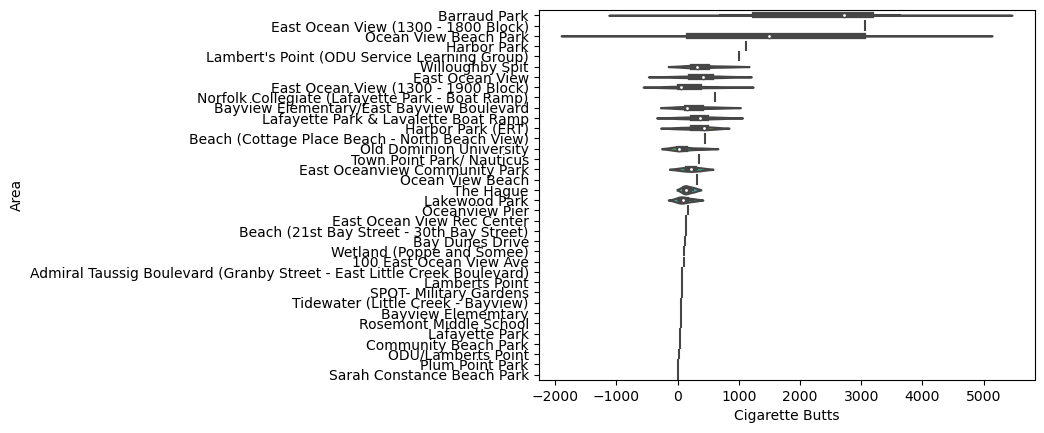

In [27]:
# try another variable, "Cigarette Butts"
data.sort_values(by='Cigarette Butts', ascending=False, inplace=True)
sns.violinplot(data=data, x='Cigarette Butts', y='Area')
plt.show()

In [28]:
# Z-score calculation
z = np.abs(stats.zscore(data['Cigarette Butts']))

# Identifying outliers 
outliers = np.where(z > 3)
print(outliers)

(array([0], dtype=int64),)


####  Remove outliers from each column?
* apply z-score to the whole sliced dataset
* use mask to filter out the outliers

In [29]:
# Calculate the Z-score for each column
data_zscore = data_sliced.apply(zscore)

# filter out rows that with outliers using mask
mask = (data_zscore < 3)

data_filtered = data_sliced[mask]

# Get the number of NaN values in each column
nan_count = data_filtered.isna().sum()
print(nan_count)

Cigarette Butts                              1
Food Wrappers (candy, chips, etc.)           2
Take Out/Away Containers (Plastic)           2
Take Out/Away Containers (Foam)              1
Bottle Caps (Plastic)                        2
Bottle Caps (Metal)                          2
Lids (Plastic)                               1
Straws, Stirrers                             1
Forks, Knives, Spoons                        1
Beverage Bottles (Plastic)                   1
Beverage Bottles (Glass)                     1
Beverage Cans                                2
Grocery Bags (Plastic)                       2
Other Plastic Bags                           1
Paper Bags                                   1
Cups, Plates (Paper)                         3
Cups, Plates (Plastic)                       2
Cups, Plates (Foam)                          1
Fishing Buoys, Pots & Traps                  1
Fishing Net & Pieces                         1
Fishing Line (1 yard/meter = 1 piece)        2
Rope (1 yard/

### Thought: though statiscally we get outliers, are those outliers really making sense?

* For example, the column of 'Number of Volunteers' has two outliers, I decided not to discard them in the next follwing analysis, becasue I think those numbers are real recorded numbers, and volunteers numbers are expected to be random at episodic events like these.

* The anlysis above just showed that we could identify outliers and clean the dataset based on z-score. However, in the following analysis, I still used the raw dataset without teasing out "outliers". Becasue, the DATA DENSITY may not allow me to judge which one is the true outliers, unless I have a reference, such as long-term mean and assocaited stdv.

### Q6. How do your variables relate to each other?
* scatter plot

* correlation matrix

* heatmap

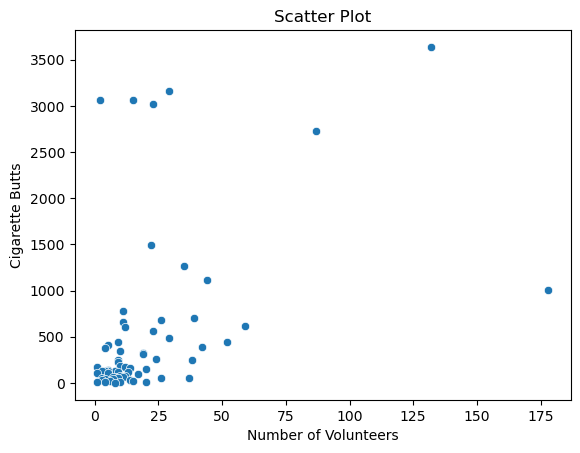

In [30]:
# Create the scatter plot in seaborn
sns.scatterplot(x='Number of Volunteers', y='Cigarette Butts', data=data)

# Add labels and title
plt.xlabel('Number of Volunteers')
plt.ylabel('Cigarette Butts')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [31]:
# Fit a linear regression model
x = data['Number of Volunteers'].values
y = data['Cigarette Butts'].values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the results
print(f"Slope: {slope}") 
# 'f' string is a formatted string that contains varibles values in '{}'
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 13.63456830506721
Intercept: 261.2711026679024
R-value: 0.4460367582924437
P-value: 0.0001962248919757896
Standard error: 3.4469152613870144


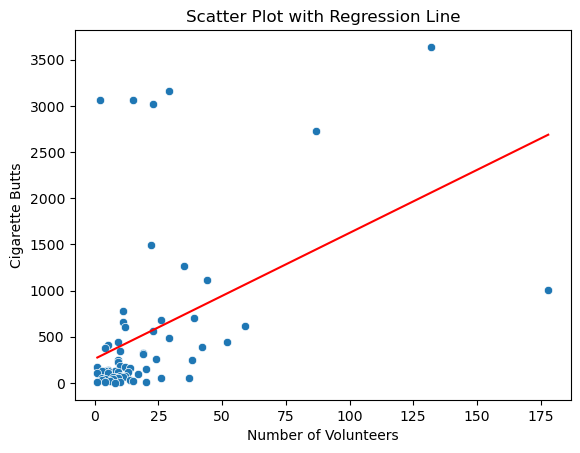

In [32]:
# Create the scatter plot in seaborn
sns.scatterplot(x='Number of Volunteers', y='Cigarette Butts', data=data)

x_values = [min(x), max(x)]
y_values = [slope*x + intercept for x in x_values]
plt.plot(x_values, y_values, color='red', label='regression line')

# Add labels and title
plt.xlabel('Number of Volunteers')
plt.ylabel('Cigarette Butts')
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.show()

Slope: 90.30556815238033
Intercept: 393.6497366294634
R-value: 0.7235601459636912
P-value: 9.840968218888889e-12
Standard error: 10.853833772301769


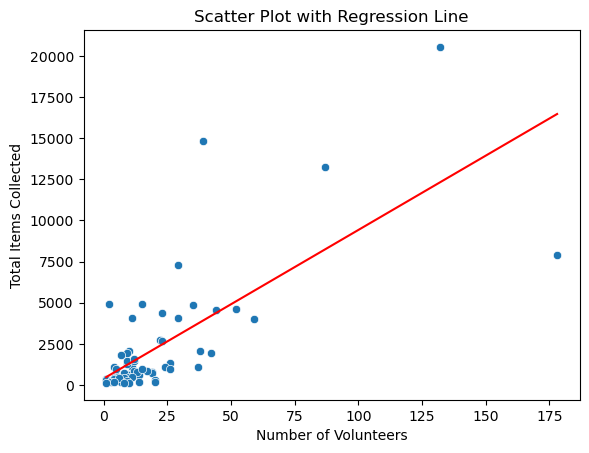

In [33]:
# Create the scatter plot in seaborn
sns.scatterplot(x='Number of Volunteers', y='Total Items Collected', data=data)

x = data['Number of Volunteers'].values
y = data['Total Items Collected'].values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the results
print(f"Slope: {slope}") 
# 'f' string is a formatted string that contains varibles values in '{}'
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Plot the regression line
x_values = [min(x), max(x)]
y_values = [slope*x + intercept for x in x_values]
plt.plot(x_values, y_values, color='red', label='regression line')

# Add labels and title
plt.xlabel('Number of Volunteers')
plt.ylabel('Total Items Collected')
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.show()

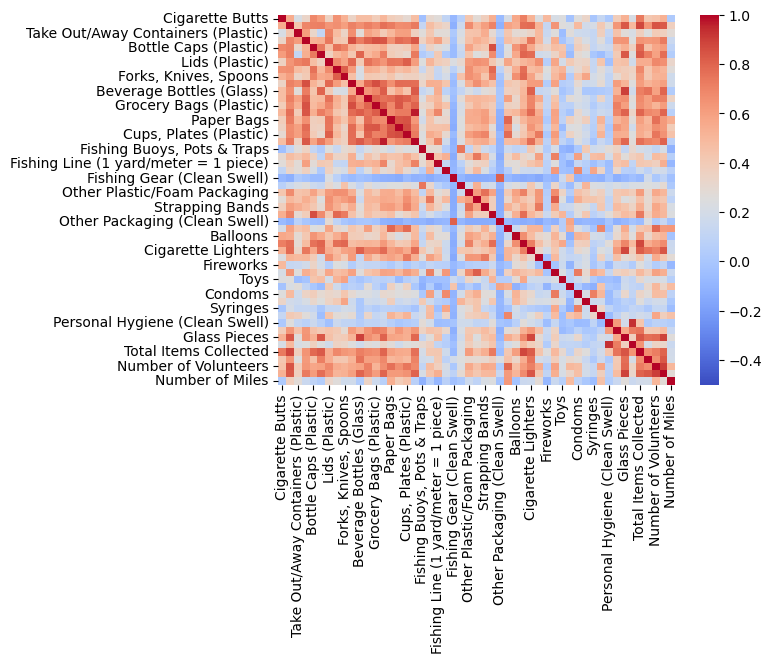

In [34]:
# Calculate the correlation matrix
corr_matrix = data_sliced.corr()

# plotting a heatmap 
sns.heatmap(corr_matrix, vmin=-0.5, vmax=1, annot=False,cmap='coolwarm')
plt.show()

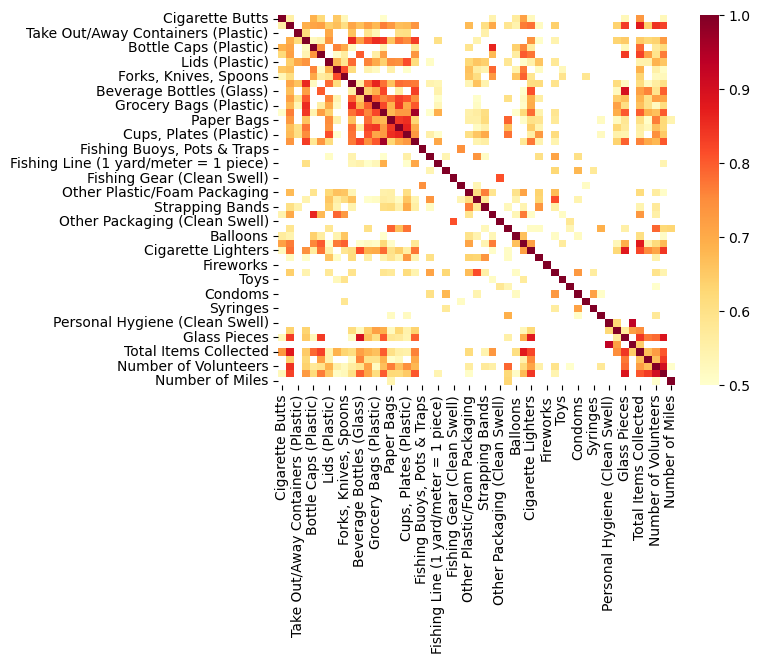

In [35]:
# Threshold the correlation matrix
mask = np.abs(corr_matrix >= 0.5)

# plot the result
sns.heatmap(corr_matrix[mask],vmin=0.5, vmax=1, annot=False,cmap='YlOrRd')
plt.show()

# please note that the range is [0.5 1] becasue any absolute p-value was filtered out 

* Results show there were NO SIGNIFICANT NEGATIVE correlations among parameters
* Apparently many parameters show POSITIVE correlations 
* For example, 'cups,plates' has significant postive corr with paper bags; Bottle Caps has significant postive corr with Beverage Bottles (Glass); total number collected vs number of miles and so on 

## Initital conclusions

1. This data set contains 69 rows and 53 columns, meaning there are 69 datapoints for each variable or column.
2. This data set has a combination data types of 3, including: float64 (n=4), int64 (n=47), object (n=2)
3. There are are no missing values. 

    * We should give a second thought about if we should consider 0 as missing values, because they are certainly not missing values, instead they may have true meanings. For example, volunteers found 0 cigarette butts in a place, it may mean that they did not find one during their volunteer hours or there are 0 cigaretter butts.    

    * However, I considerred "Number of Volunteers" with 0 as invalid, and exlucded 4 rows from the dataset for EDA, which yields 65 data points for each column.
4. A summary statistics of the data set include min, max, mean, median and std etc. are achieved by using 'data.describe()'
5. Frequency analysis shows that the distribution of date, area, and volunteers numbers were very irregular, which may affect the credibility/quality of the statistics. 
    * For example, most of the places were only visited once; volunteers numbers spiked on a certain date or at a certain place (e.g., Barraud Park), while other dates/places had much less volunteers (e.g., Wetland (Poppe and Somee)). 
    
    * Consequently, Barraud Park has the highest amount of litters (e.g., Cigarette Butts).
    
5. Some outliers were identified using Z-score (abs>3), however, they were not teased out during the EDA, becasue of the dramatic difference in the sample size. Some sample size was not efficient to draw a conlusion from.

6. Nevertheless, some significant correlation among variables were indentified using scatter plot and heatmap. 

    * For example, there was a significant (p<0.05) positive linear relationship between Numbers of Volunteers and Total items collected.
    * Heatmap shows that in fact, Numbers of Volunteers exhibited significant positive correlations with the majority of variables, except for litters related to Fishing, Toys, Fireworks, and Syringes.
    * Food and drink related litters have extremely high correlations, which makes sense, because pieces like lids, forks, bags always come together.
7. Future suggestion is that distribute volunteers more evenly to get enough sample size and data density temporally and spatially.
8. Due to limited time I have, my EDA stopped at heatmap, but further analysis can focus on: (1) examining if there were time changes of the cleaning conditions (improving or worsening) for certain area; (2) identifying which locations are hotspots for certain types of litters; (3) examining if more litters were found after public events or weekends at certain locations; (4) which litters contributed most of the total items collected.